In [2]:
# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# [과제] 최적의 Decision Tree 모델 찾기

---

## 본 과제의 목표는 다음과 같음

1. Decision Tree 모델을 사이킷런 패키지를 이용해 정의할 수 있음
2. `GridSearchCV` 클래스를 이용하여, 가장 높은 성능과 최적의 하이퍼파라미터를 찾을 수 있음

## [P.1] GridSearchCV 클래스를 이용하여 최적의 모델 찾기

이전 과제에서 사용했던 `GridSearchCV` 클래스를 활용해 해당 데이터에 가장 좋은 성능을 보여주는 모델 찾기

In [3]:
# don't change the option
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o")
    
    if show:
        plt.show()

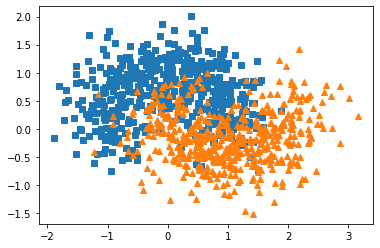

In [5]:
plot_dataset(X, y)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth' : [3, 5, 10, 15, 20, 100], 
              "max_leaf_nodes" : [10, 20, 30, 100], 
              "min_samples_split" : [10, 50, 100, 200]}

grid_search_cv = GridSearchCV(tree_clf, param_grid)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 100],
                         'max_leaf_nodes': [10, 20, 30, 100],
                         'min_samples_split': [10, 50, 100, 200]})

In [7]:
# get results of cross-validation
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00078206, 0.00075026, 0.00074306, 0.000739  , 0.00073872,
        0.00073833, 0.00073371, 0.00073109, 0.00072861, 0.00073004,
        0.00072656, 0.00072784, 0.0007319 , 0.00072894, 0.00072737,
        0.00072851, 0.00081053, 0.00080895, 0.0008121 , 0.00074625,
        0.00084648, 0.00083876, 0.00081196, 0.00074258, 0.00084786,
        0.00083928, 0.00081329, 0.0007411 , 0.00084863, 0.00084009,
        0.00081401, 0.00074449, 0.00080581, 0.00080929, 0.0008172 ,
        0.00074301, 0.00086827, 0.00088124, 0.00082984, 0.00074248,
        0.00089822, 0.00087953, 0.00082912, 0.0007503 , 0.00097384,
        0.00087862, 0.00082893, 0.0007463 , 0.00080919, 0.00081491,
        0.00082226, 0.00074582, 0.00087247, 0.0008811 , 0.00083084,
        0.00074697, 0.0008986 , 0.00088005, 0.00082664, 0.00074329,
        0.00098791, 0.0008801 , 0.0008296 , 0.0007442 , 0.00080743,
        0.0008112 , 0.00081458, 0.00074573, 0.00088639, 0.00087438,
        0.00082827, 0.00074348,

In [8]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, min_samples_split=10,
                       random_state=42)

In [9]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.868

In [14]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(-2, 4, 100)
        x1 = np.linspace(-2, 2.5, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)
        
    
    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

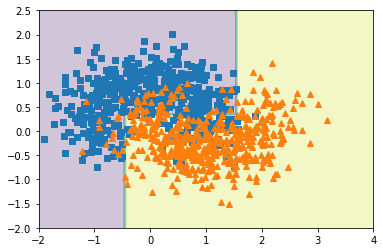

In [15]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(grid_search_cv)

plt.show()